In [1]:
from __future__ import print_function, division
from builtins import range
import os
import requests
import zipfile
import numpy as np
import pandas as pd
#from scipy.misc import imread, imsave, imresize
from scipy.misc.pilutil import imread,imsave, imresize
from glob import glob
from tqdm import tqdm
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

In [2]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x,0)
    return x

In [15]:
def get_mnist(limit=None):
    if not os.path.exists('Dataset'):
        print("You must create a folder called large_files adjacent to the class folder first.")
    if not os.path.exists('Dataset/train.csv'):
        print("Looks like you haven't downloaded the data or it's not in the right spot.")
        print("Please get train.csv from https://www.kaggle.com/c/digit-recognizer")
        print("and place it in the large_files folder.")

    print("Reading in and transforming data...")
    df = pd.read_csv('Dataset/train.csv')
    data = df.values
    # np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    X, Y = shuffle(X, Y)
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

In [16]:
class BayesClassifier:
    def fit(self, X, Y):
        # assume classes are numbered 0...K-1
        self.K = len(set(Y))

        self.gaussians = []
        self.p_y = np.zeros(self.K)
        for k in range(self.K):
            print("Fitting gmm", k)
            Xk = X[Y == k]
            print(Xk.shape)
            self.p_y[k] = len(Xk)
            gmm = BayesianGaussianMixture(10)
            gmm.fit(Xk)
            self.gaussians.append(gmm)
        # normalize p(y)
        self.p_y /= self.p_y.sum()
        
    def sample(self):
        y = np.random.choice(self.K, p=self.p_y)
        return clamp_sample( self.sample_given_y(y) )
        
    def sample_given_y(self, y):
        gmm = self.gaussians[y]
        sample = gmm.sample()
        # note: sample returns a tuple containing 2 things:
        # 1) the sample
        # 2) which cluster it came from
        # we'll use (2) to obtain the means so we can plot
            
        mean = gmm.means_[sample[1]]
        return clamp_sample( sample[0].reshape(28, 28) ), mean.reshape(28, 28)
    
        

Reading in and transforming data...
(42000, 784)
(42000,)
Fitting gmm 0
(4132, 784)
Fitting gmm 1
(4684, 784)
Fitting gmm 2
(4177, 784)
Fitting gmm 3
(4351, 784)
Fitting gmm 4
(4072, 784)
Fitting gmm 5
(3795, 784)
Fitting gmm 6
(4137, 784)
Fitting gmm 7
(4401, 784)
Fitting gmm 8
(4063, 784)
Fitting gmm 9
(4188, 784)


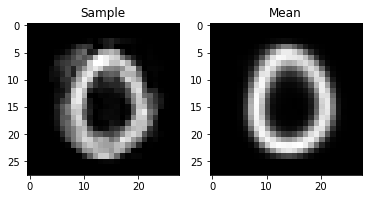

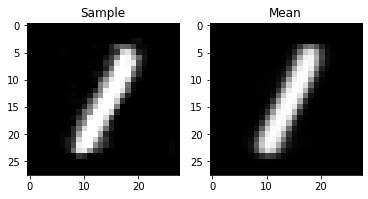

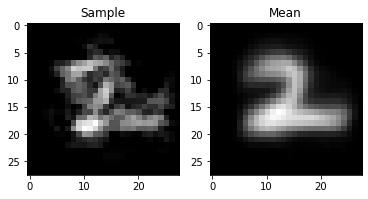

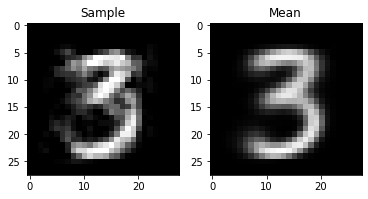

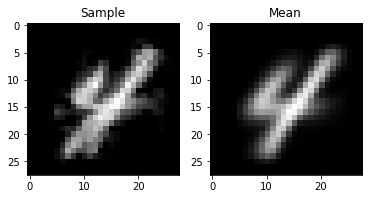

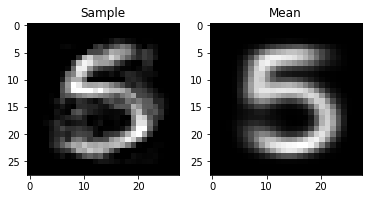

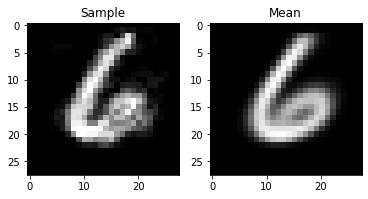

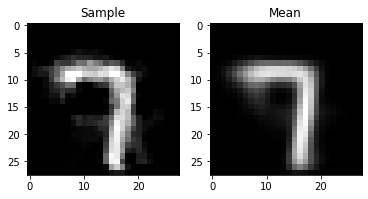

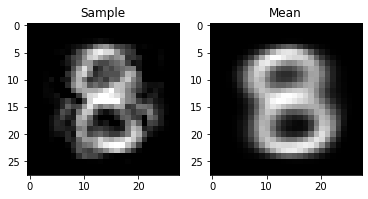

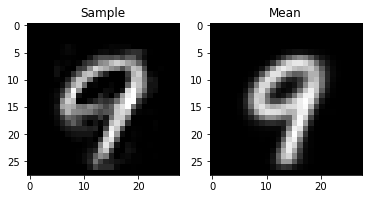

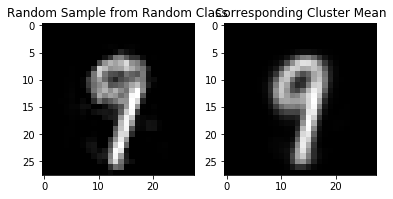

In [17]:
if __name__ == '__main__':
    X, Y = get_mnist()
    clf = BayesClassifier()
    print(X.shape)
    print(Y.shape)
    clf.fit(X, Y)

    for k in range(clf.K):
        # show one sample for each class
        # also show the mean image learned

        sample, mean = clf.sample_given_y(k)

        plt.subplot(1,2,1)
        plt.imshow(sample, cmap='gray')
        plt.title("Sample")
        plt.subplot(1,2,2)
        plt.imshow(mean, cmap='gray')
        plt.title("Mean")
        plt.show()

    # generate a random sample
    sample, mean = clf.sample()
    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Random Sample from Random Class")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Corresponding Cluster Mean")
    plt.show()